In [1]:
import numpy as np

# 1、生成 x_data，值为 [0, 100]之间500个等差数列数据集合作为样本特征
x_data = np.linspace(0, 100, 500)
# 根据目标线性方程 y=3.1234*x+2.98，生成相应的标签集合 y_data，1分；
y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape)

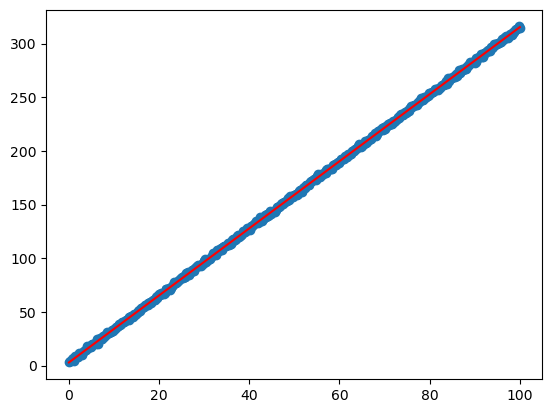

In [2]:
import matplotlib.pyplot as plt

# 2、画出随机生成数据的散点图和想要通过学习得到的目标线性函数 y=3.1234*x+2.98，1分；
plt.scatter(x_data, y_data)
plt.plot([0, 100], [2.98, 312.34 + 2.98], 'r')

In [3]:
import tensorflow as tf

# 3、构建回归模型，3分；
def model(x, w, b):
    return tf.multiply(x, w) + b

In [4]:
# 创建待优化变量
with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        w = tf.Variable(np.random.randn(), tf.float32, name='w0')
    with tf.name_scope('biases'):
        b = tf.Variable(0.0, tf.float32, name='b0')

In [5]:
# 定义损失函数
def loss(x, y, w, b):
    err = model(x, w, b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

In [6]:
# 定义计算梯度函数
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

In [7]:
# 4、训练模型，10轮，每训练20个样本显示损失值，2分；
train_epochs = 10
lr = 1e-4

loss_list = []
display_step = 20

for epoch in range(train_epochs):
    step = 0
    for xs, ys in zip(x_data, y_data):
        loss_ = loss(xs, ys, w, b)
        loss_list.append(loss_)

        delta_w, delta_b = grad(xs, ys, w, b)
        change_w = delta_w * lr
        change_b = delta_b * lr
        w.assign_sub(change_w)
        b.assign_sub(change_b)

        step += 1
        if step % display_step == 0:
            print("Train epoch: ", epoch+1, "Step: ", step, "Loss: ", loss_.numpy())

Train epoch:  1 Step:  20 Loss:  393.2895
Train epoch:  1 Step:  40 Loss:  1078.9966
Train epoch:  1 Step:  60 Loss:  1159.5739
Train epoch:  1 Step:  80 Loss:  358.06622
Train epoch:  1 Step:  100 Loss:  47.67121
Train epoch:  1 Step:  120 Loss:  1.1101298
Train epoch:  1 Step:  140 Loss:  0.08836594
Train epoch:  1 Step:  160 Loss:  5.0454855
Train epoch:  1 Step:  180 Loss:  1.6659532
Train epoch:  1 Step:  200 Loss:  1.021862
Train epoch:  1 Step:  220 Loss:  1.1329631
Train epoch:  1 Step:  240 Loss:  0.024562106
Train epoch:  1 Step:  260 Loss:  3.594107
Train epoch:  1 Step:  280 Loss:  1.6619182
Train epoch:  1 Step:  300 Loss:  1.0250883
Train epoch:  1 Step:  320 Loss:  0.16963297
Train epoch:  1 Step:  340 Loss:  6.5425763
Train epoch:  1 Step:  360 Loss:  4.7739477
Train epoch:  1 Step:  380 Loss:  0.42674768
Train epoch:  1 Step:  400 Loss:  15.161788
Train epoch:  1 Step:  420 Loss:  16.003418
Train epoch:  1 Step:  440 Loss:  0.005544722
Train epoch:  1 Step:  460 Loss: 

In [8]:
# 5、通过训练出的模型预测 x=5.79 时 y 的值，并显示根据目标方程显示的 y 值，1分；
test_x = [5.79]
pred = model(test_x, w, b)
pred.numpy(), 5.79 * 3.1234 + 2.98

(array([18.768686], dtype=float32), 21.064486000000002)

In [17]:
import datetime
 
# 创建日志
stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = './log/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# 开启autograph跟踪
tf.summary.trace_on(graph=True, profiler=True) 

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=(1,))]
)
model.compile(
    optimizer='adam',
    loss='mse'
)
model.fit(x_data, y_data, epochs=10)

# 将计算图信息写入日志
with writer.as_default():
    tf.summary.trace_export(
        name="autograph",
        step=0,
        profiler_outdir=logdir)

Instructions for updating:
use `tf.profiler.experimental.start` instead.
Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 10321.8418
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 10136.0244
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 9949.3174
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 9768.6484
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 9586.0312
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 9410.7812
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 9233.3057
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 9061.3623
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 8890.0312
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 8724.2402
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Instructions for updating:
`tf.p

In [18]:
# 启动 tensorboard
%load_ext tensorboard
# 启动tensorboard
%tensorboard --logdir ./log/
# 打开 http://localhost:6006/